# Quantitative Risk management (Market Risk) in R

## Understanding Value-at-Risk (VaR)

Value-at-Risk (VaR) measures the potential loss in value of a financial asset or portfolio over a given time frame, with a specified confidence level.

Let $F(x)$ represent the cumulative distribution function of a random variable $ X $, which models asset returns. Given a confidence level $ q $ (e.g., $ q = 0.99 $), the VaR at level $ q $ is defined as the smallest value $ x_q $ such that:

$$
P(X \leq x_q) = F(x_q) \geq q
$$

so $ \text{VaR}_q(X) $ is:

$$
\text{VaR}_q(X) = x_q = \inf \{ x \in \mathbb{R} : F(x) \geq q \}
$$

This means that with probability $ q $, the loss will not exceed $ x_q $ or with probability $ (1-q) $, the loss will exceed $ x_q $.

For a continuous and strictly increasing $ F(x) $, the VaR simplifies to the inverse function:

$$
\text{VaR}_q(X) = F^{-1}(q)
$$

In other words, VaR at level $ q $ corresponds to the $ q $-quantile of $ X $, representing the threshold below which losses occur with probability $ q $.


## Limitations of Value-at-Risk (VaR)

While widely used in risk management, **Value-at-Risk (VaR) is not a coherent risk measure** because it does not always satisfy the **subadditivity property**, which ensures diversification benefits.

The subadditivity condition states that for any two financial positions, $X$ and $Y$:

$$
\rho(X + Y) \leq \rho(X) + \rho(Y)
$$

This property implies that merging two portfolios should not increase overall risk. However, **VaR can fail to meet this requirement**, making it a less reliable measure of total risk in certain cases.

The **subadditivity principle** reflects the idea that **diversification reduces risk**. In other words, the total risk of a combined portfolio should not exceed the sum of the individual risks:

- A well-diversified portfolio **spreads risk**, making it safer than simply adding up the risks of separate assets.  
- If a risk measure violates subadditivity, it suggests that diversification **fails to reduce** overall risk, contradicting a fundamental principle of modern finance.  



## Expected Shortfall (ES)

**Expected Shortfall (ES)**, also known as **Conditional VaR (CVaR)**, provides a more comprehensive measure of extreme losses compared to Value-at-Risk (VaR). Instead of focusing on a single quantile, ES captures the **average loss in the worst-case scenarios** beyond a given confidence level.


For a confidence level $q$, the expected shortfall is defined as:

$$
ES_q = \frac{1}{1 - q} \int_q^1 \text{VaR}_u(X) \, du
$$

This represents the **average VaR** over all levels $u \geq q$.

For a **continuous loss distribution**, ES can also be expressed as:

$$
ES_q = E[X \mid X > x_q]
$$

This means that ES is the **expected loss given that losses exceed the VaR threshold** at level $q$.

Unlike VaR, **Expected Shortfall is a coherent risk measure**, meaning it satisfies all desirable properties of a risk measure, including **subadditivity**. This makes ES a more reliable tool for assessing financial risk, especially in extreme market conditions.


### Value-at-Risk (VaR) and Expected Shortfall (ES) for Normal Distribution

Let $ X \sim N(\mu, \sigma^2) $, a normally distributed random variable with mean $ \mu $ and variance $ \sigma^2 $.

- **Value-at-Risk (VaR)** at confidence level $ q $ is given by:

  $$
  \text{VaR}_q(X) = \mu + \sigma \Phi^{-1}(q)
  $$

  where $ \Phi^{-1}(q) $ is the **quantile function** of the standard normal distribution.

- **Expected Shortfall (ES)** at confidence level $ q $ is given by:

  $$
  \text{ES}_q = \mu + \sigma \frac{\phi(\Phi^{-1}(q))}{1 - q}
  $$

  where $ \phi(\cdot) $ is the **probability density function (PDF)** of the standard normal distribution, and $ \Phi^{-1}(q) $ is the quantile of the standard normal.


### Value-at-Risk (VaR) and Expected Shortfall (ES) for a Student-t Distribution

Let $ X $ be a random variable such that $ \frac{X - \mu}{\sigma} \sim t_\nu $, where $ t_\nu $ represents
the **Student's t-distribution** with $ \nu $ degrees of freedom $( \nu > 1 $).

- The **Value-at-Risk (VaR)** at confidence level \( q \) is:

  $$
  \text{VaR}_q(X) = \mu + \sigma t_{\nu-1}^{-1}(q)
  $$

  where $ t_{\nu-1}^{-1}(q) $ is the **quantile function** of the **Student's t-distribution** with $ \nu-1 $ degrees of freedom.

- The **Expected Shortfall (ES)** at confidence level $ q $ is:

  $$
  \text{ES}_q = \mu + \sigma \frac{g_{\nu}(t_{\nu-1}^{-1}(q))}{1 - q} \frac {\nu + (t_{\nu-1}^{-1}(q))^2 }{\nu - 1}
  $$

  where $ g_{\nu} $ is the **Probability Density Function** of the **Student's t-distribution** with $ \nu $ degrees of freedom, and $ t_{\nu-1}^{-1}(q) $ is the quantile at confidence level $ q $.


## Calculating VaR and ES for Different Confidence Levels

We will calculate **Value-at-Risk (VaR)** and **Expected Shortfall (ES)** at different confidence levels, $\alpha = 0.9$, $\alpha = 0.99$, and $\alpha = 0.999$, for two distributions:

1. **Standard Normal Distribution** $N(0, 1)$  
2. **Student's t-distribution with 4 degrees of freedom** $t_4$, where the mean ($\mu$) = 0 and variance ($\sigma^2$) = 1

- For both distributions, **mean** ($\mu$) = 0
- **Variance** ($\sigma^2$) = 1 for both the Normal and the $t_4$ distribution

We'll compute **VaR** and **ES** for the given confidence levels for both distributions.



### 1. Value-at-Risk (VaR) for normal distribution:
VaR at the confidence level $\alpha$ is calculated using the **quantile function** of the normal distribution. Note that quantile function is the **inverse cumulative distribution function** and recall that $ \text{VaR}_q(X) = F^{-1}(q) $.

```r
alpha <- c(0.9, 0.99, 0.999)

# Calculate VaR using quantile function
qnorm(alpha)

# Alternatively, using VaR_t function in the qrmtoolsd package:
#install.pckages("qrmtools")
library(qrmtools)
VaR_t(alpha, loc = 0, scale = 1, df = Inf)
# In this case, loc is μ (mean), scale is σ (standard deviation), df is the degrees of freedom (∞ for normal distribution)

In [124]:
alpha <- c(0.9, 0.99, 0.999)
qnorm(alpha)
library(qrmtools)
VaR_t(alpha, loc = 0, scale = 1, df = Inf)

[1] 1.281552 2.326348 3.090232

[1] 1.281552 2.326348 3.090232

The quantile (1.28155) means that there's a 10% chance the loss will exceed 1.28155, or in simpler terms, there’s a 10% chance that returns will be worse than -1.28155.

### 2. Expected Shortfall (ES) for the Normal distribution:

Calculate ES using the PDF of the Normal distribution:
For each alpha value, compute the density at the quantile point, then divide by (1 - alpha)
``` r
dnorm(qnorm(alpha)) / (1 - alpha)

# Alternatively, using the ES_t function from the qrmtools package:
library(qrmtools)
ES_t(alpha, loc = 0, scale = 1, df = Inf)



In [81]:
dnorm(qnorm(alpha)) / (1 - alpha)
library(qrmtools)
ES_t(alpha, loc = 0, scale = 1, df = Inf)

[1] 1.754983 2.665214 3.367090

[1] 1.754983 2.665214 3.367090

The quantile (1.75498) means that there's a 10% chance the loss will exceed 1.28155, or in simpler terms, there’s a 10% chance that returns will be worse than -1.28155.

### 3. Value-at-Risk (VaR) for student's t-distribution with df = 4:

``` r
nu <- 4
# Calculate VaR using quantile function
qt(alpha, df = nu)
# Alternatively, using VaR_t function in the qrmtoolsd package:
VaR_t(alpha, loc = 0, scale = 1, df = nu)



In [164]:
nu <- 4
qt(alpha, df = nu)
VaR_t(alpha, loc = 0, scale = 1, df = nu)

[1] 1.533206 3.746947 7.173182

[1] 1.533206 3.746947 7.173182

### 4. Expected Shortfall (ES) for the student's t-distribution with df = 4:


``` r
( dt(qt(alpha, nu), nu)/(1-alpha) )*( (nu + (qt(alpha, nu))^2)/(nu-1) )

# Alternatively, using the ES_t function from the qrmtools package:
library(qrmtools)
ES_t(alpha, loc = 0, scale = 1, df = nu)


In [182]:
( dt(qt(alpha, nu), nu)/(1-alpha) )*( (nu + (qt(alpha, nu))^2)/(nu-1) )
ES_t(alpha, loc = 0, scale = 1, df = nu)

[1] 2.499340 5.220584 9.686219

[1] 2.499340 5.220584 9.686219

Observe how VaR and ES evolve as the degrees of freedom increase, leading to thinner tails in the distribution.

In [188]:
VaR_t(alpha, loc = 0, scale = 1, df = 1)
ES_t(alpha, loc = 0, scale = 1, df = 1)
VaR_t(alpha, loc = 0, scale = 1, df = 2)
ES_t(alpha, loc = 0, scale = 1, df = 2)
VaR_t(alpha, loc = 0, scale = 1, df = 20)
ES_t(alpha, loc = 0, scale = 1, df = 20)
VaR_t(alpha, loc = 0, scale = 1, df = Inf) # this is Normal distribution
ES_t(alpha, loc = 0, scale = 1, df = Inf) # this is Normal distribution


[1]   3.077684  31.820516 318.308839

[1] Inf Inf Inf

[1]  1.885618  6.964557 22.327125

[1]  4.242641 14.071247 44.698993

[1] 1.325341 2.527977 3.551808

[1] 1.863991 2.976915 3.981407

[1] 1.281552 2.326348 3.090232

[1] 1.754983 2.665214 3.367090

Observe how VaR and ES progressively converge as $\alpha$ approaches 1 in the case of a Gaussian distribution.

In [5]:
alpha <- c(0.9, 0.99, 0.999, 0.9999, 0.999999)
VaR_t(alpha, loc = 0, scale = 1, df = Inf) / ES_t(alpha, loc = 0, scale = 1, df = Inf)

[1] 0.7302358 0.8728559 0.9177754 0.9395063 0.9606113

for a student's t-distribution,  $\frac{VaR}{ES}$ converge to  $\frac{\nu -1}{\nu}$  as alpha increases toward 1,

In [12]:
VaR_t(alpha, loc = 0, scale = 1, df = 4) / ES_t(alpha, loc = 0, scale = 1, df = 4)
VaR_t(alpha, loc = 0, scale = 1, df = 3) / ES_t(alpha, loc = 0, scale = 1, df = 3)
VaR_t(alpha, loc = 0, scale = 1, df = 2) / ES_t(alpha, loc = 0, scale = 1, df = 2)

[1] 0.6134444 0.7177257 0.7405554 0.7470824 0.7497110

[1] 0.5626407 0.6483864 0.6628794 0.6658574 0.6666292

[1] 0.4444444 0.4949495 0.4994995 0.4999500 0.4999995

## Portfolio Value at Risk and Expected Shortfall

Create a plot showing $VaR_\alpha$ and $ES_\alpha$ as a function of $1 - \alpha$ for a portfolio value of 10,000 euros and two different distributions: 
- $N(0, \sigma)$ with $\sigma = \frac{0.2}{\sqrt{252}}$, and 
- a Student-$t$ distribution with 4 degrees of freedom and standard deviation $\sigma$. 

The abscissa should be in log scale. 

Is the VaR and ES of the normal distribution always smaller than the corresponding values of the Student-$t$ distribution?


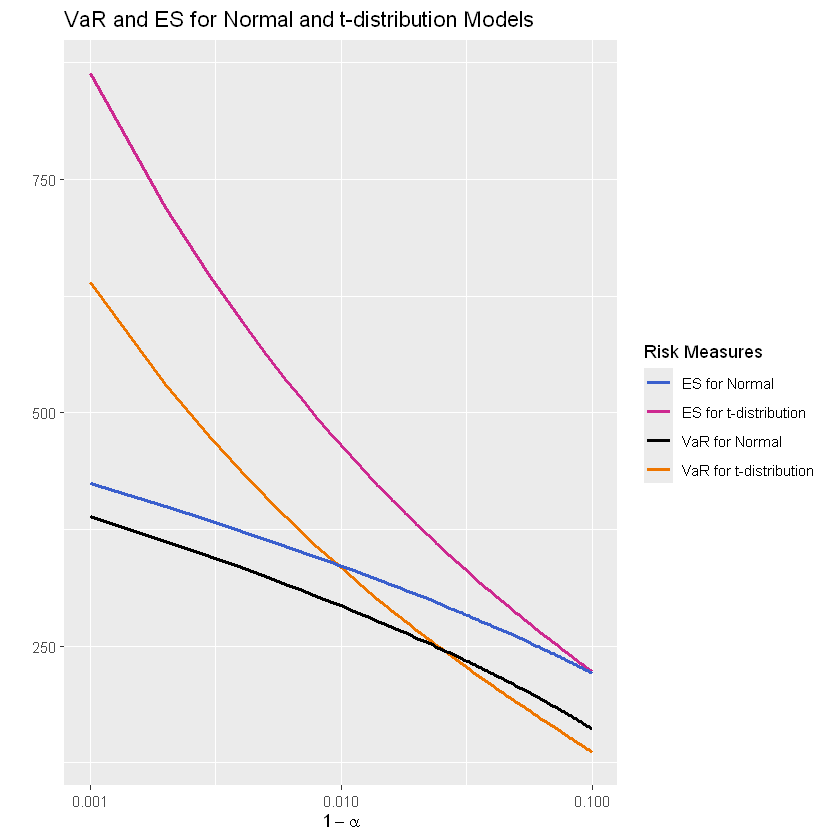

In [48]:
library(qrmtools)
library(tidyverse)
library(dplyr)
library(ggplot2)

# Parameters
V <- 10000 # value of the portfolio today
sig <- 0.2/sqrt(252) # daily volatility (annualized volatility of 20%)
nu <- 4 # degrees of freedom for the t distribution
alpha <- seq(0.9, 0.999, length.out = 100)

# Calculate VaR and ES for normal and t-distribution models
VaR_n <- VaR_t(alpha, scale = V * sig, df = Inf) # VaR_alpha under normal
VaR_t_val <- VaR_t(alpha, scale = V * sig * sqrt((nu - 2) / nu), df = nu) # VaR_alpha under t
ES_n <- ES_t(alpha, scale = V * sig, df = Inf) # ES_alpha under normal
ES_t_val <- ES_t(alpha, scale = V * sig * sqrt((nu - 2) / nu), df = nu) # ES_alpha under t

# Prepare the data for plotting
data <- data.frame(
  alpha = 1 - alpha,  # we use 1-alpha for the x-axis
  VaR_normal = VaR_n,
  VaR_t = VaR_t_val,
  ES_normal = ES_n,
  ES_t = ES_t_val
)

# Plot using ggplot2 with log-scaled x-axis
ggplot(data, aes(x = alpha)) +
  geom_line(aes(y = ES_t, color = "ES for t-distribution"), size = 1) +
  geom_line(aes(y = VaR_t, color = "VaR for t-distribution"), size = 1) +
  geom_line(aes(y = ES_normal, color = "ES for Normal"), size = 1) +
  geom_line(aes(y = VaR_normal, color = "VaR for Normal"), size = 1) +
  scale_x_log10(name = expression(1 - alpha)) +  # Apply log scale to x-axis
  labs(y = "", title = "VaR and ES for Normal and t-distribution Models") +
  scale_color_manual(values = c("ES for t-distribution" = "maroon3",
                                "VaR for t-distribution" = "darkorange2",
                                "ES for Normal" = "royalblue3",
                                "VaR for Normal" = "black")) +
  guides(color = guide_legend(title = "Risk Measures"))



This shows that $VaR_\alpha$ (or $ES_\alpha$) is not always more risky for the t-distribution than for the normal distribution. It is only more risky for very high values of $\alpha$.
